In [1]:
import sys
import os

# Add ROOT/model path to load own modules
model_path = os.path.normpath(os.path.join(os.getcwd(), *[os.pardir]*2, "model"))
sys.path.insert(0, model_path)

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import get_data, ROOT_DIR
from joblib import dump
from joblib import load

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


MSE: 0.508793
RMSE: 0.713298
[0.0, 3.779996252589989]
[0.00016516262, 3.357677]


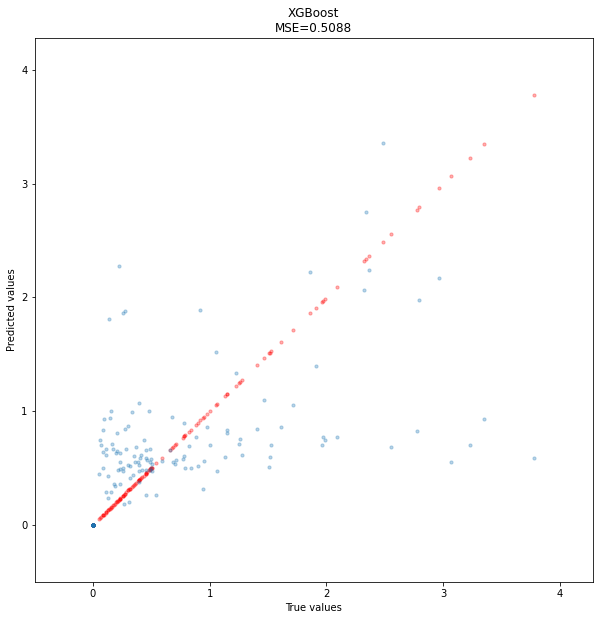

In [3]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = get_data()

xg_reg = xgb.XGBRegressor(objective='reg:tweedie', learning_rate=0.1, n_estimators=100, max_depth=3, subsample=1.0)

xg_reg.fit(X_train, Y_train, eval_metric="rmse", eval_set=[(X_validation, Y_validation)], verbose=False)

#print(xg_reg.evals_result())

preds = xg_reg.predict(X_test)
#print(preds)

def plot_preds(Y, preds, mse):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(Y, Y, s=10,  c="red", alpha=0.3)
    ax.scatter(Y, preds, s=10, alpha=0.3)
    print([np.min(Y), np.max(Y)])
    print([np.min(preds), np.max(preds)])
    ax.set(xlim=[np.min(Y) - 0.5, np.max(Y) + 0.5],
           ylim=[np.min(Y) - 0.5, np.max(Y) + 0.5],
           xlabel="True values",
           ylabel="Predicted values")
    ax.set_title("{}\nMSE={:.4f}".format("XGBoost", mse))

    plt.show()

mse = mean_squared_error(Y_test, preds)
rmse = np.sqrt(mse)
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))

plot_preds(Y_test.values, preds, mse)


In [6]:
# Save the model
dump(xg_reg, ROOT_DIR+"/best-models/xgboost/model.joblib.dat")

['/all/best-models/xgboost/model.joblib.dat']

In [7]:
xgboost_model = load(ROOT_DIR+"/best-models/xgboost/model.joblib.dat")

In [8]:
predictions = xg_reg.predict(X_test)

[0.0, 3.779996252589989]
[0.00016516262, 3.357677]


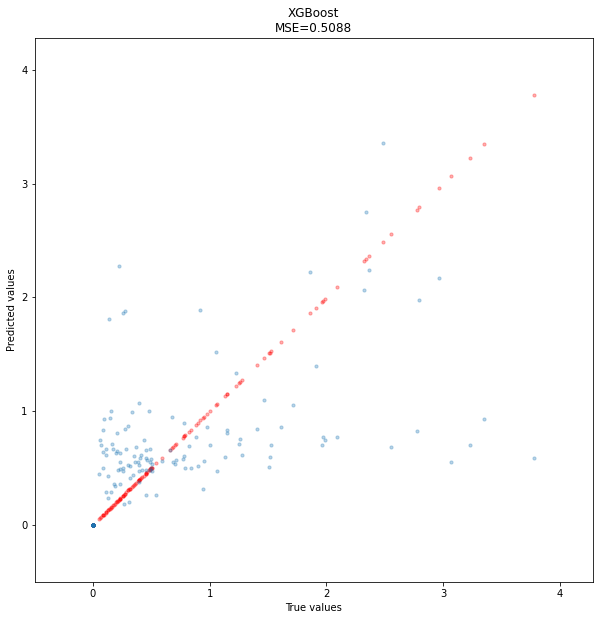

In [11]:
plot_preds(Y_test.values, predictions, mean_squared_error(Y_test.values, predictions))